#Drinking Water Potability Prediction using ML and H2O Auto ML

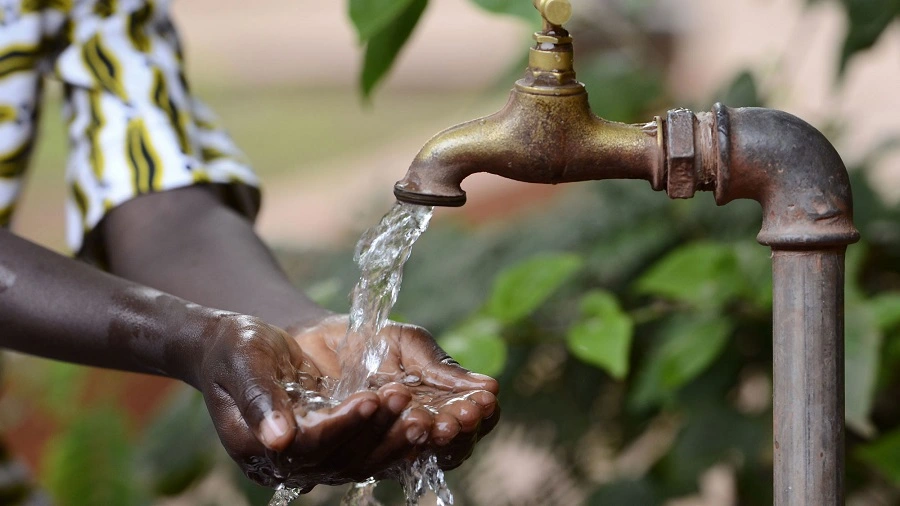


Access to clean water to drink is crucial for health, a fundamental human right, and a component of any health protection strategy. On a national, regional, and local level, this is significant as a health and development issue. Investments in water supply and sanitation have been shown to produce a net economic advantage in some areas because they reduce negative health effects and medical expenses more than they cost to implement.

**Dataset:** The drinkingwaterpotability.csv file contains water quality metrics for 3276 different water bodies.

**Project Steps:**

- Importing Libraries and DataSet
- Data Analysis and Preprocessing
- Feature Engineering
- Model Building using ML
- Model Building and Prediction using H2O Auto ML

## Importing Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Loading & Checking the Dataset

In [2]:
# load the dataset and assign it to variable "df"
df = pd.read_csv("drinking_water_potability.csv")

In [3]:
# check the head of the data

df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
# check the shape:  3276 rows and 10 columns
df.shape

(3276, 10)

In [5]:
# check the key info: non-null count and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [6]:
# check count of unique values within columns

df.nunique()

ph                 2785
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2495
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3114
Turbidity          3276
Potability            2
dtype: int64

## Exploratory Data Analysis

In [7]:
# check the descriptive statistics
# .style shows all the rows of DataFrame
df.describe().T.style 

,count,mean,std,min,25%,50%,75%,max
ph,2785.000000,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
Hardness,3276.000000,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.000000,22014.092526,8768.570828,320.942611,15666.690300,20927.833605,27332.762125,61227.196010
Chloramines,3276.000000,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,2495.000000,333.775777,41.416840,129.000000,307.699498,333.073546,359.950170,481.030642
Conductivity,3276.000000,426.205111,80.824064,181.483754,365.734414,421.884968,481.792305,753.342620
Organic_carbon,3276.000000,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3114.000000,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
Turbidity,3276.000000,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
Potability,3276.000000,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000


0    1998
1    1278
Name: Potability, dtype: int64

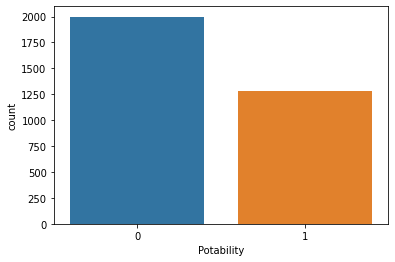

In [8]:
# visualise the count of potability.. ie "drinkable" and "not drinkable"
# the data is somewhat balanced so shouldn't be a problem
sns.countplot(data = df, x = df.Potability)
df.Potability.value_counts()

In [9]:
# check for null-values 
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [10]:
# create a dataframe with null values 
null_columns = pd.DataFrame(df[df.columns[df.isnull().any()]].isnull().sum() * 100 / df.shape[0], columns=['Percentage of NaN values'])
null_columns['Total NaN Values'] = df[df.columns[df.isnull().any()]].isnull().sum()
null_columns

,Percentage of NaN values,Total NaN Values
ph,14.987790,491
Sulfate,23.840049,781
Trihalomethanes,4.945055,162


In [11]:
# extract the null columns
null_cols = null_columns.index.tolist()
print(type(null_cols))

null_cols

<class 'list'>


['ph', 'Sulfate', 'Trihalomethanes']

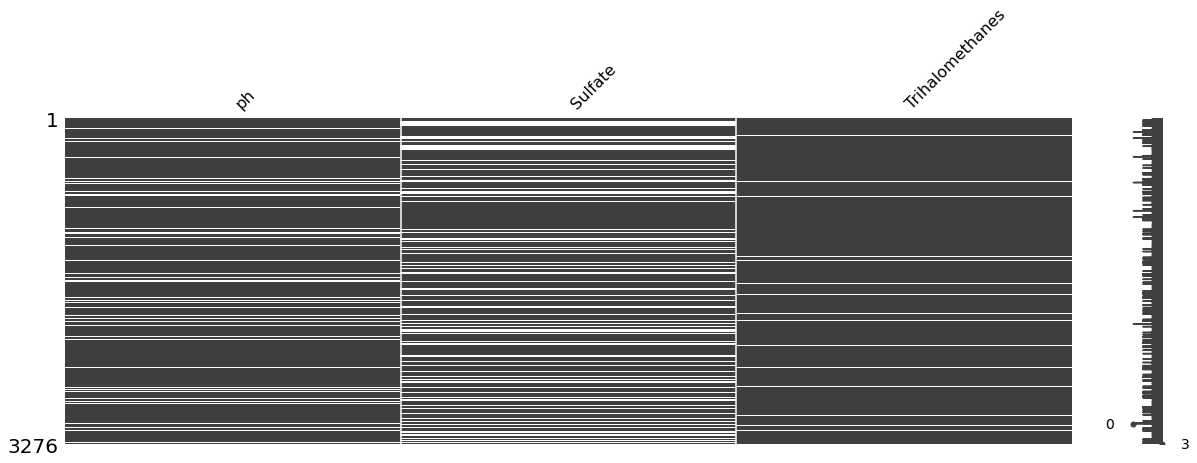

In [12]:
# visual representation of columns with missing values
import missingno as mno
mno.matrix(df[null_cols], figsize = (20, 6))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

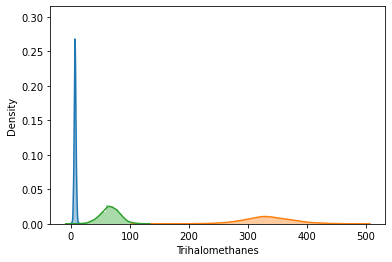

In [13]:
# null-value distribution
for i in null_cols:
    sns.distplot(df[i])

### Handling Null Values

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


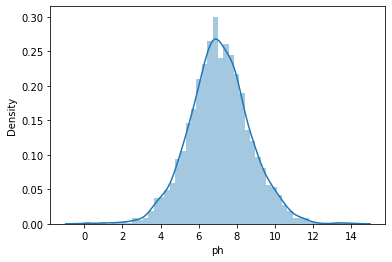

In [14]:
# check the distribution of the ph column
sns.distplot(df.ph)

In [15]:
# as the ph values exhibit a normal (gaussian) distribution,  we can safely replace the
# null-values with the mean of the ph feature
df["ph"] = df["ph"].replace(np.nan, df.ph.mean())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


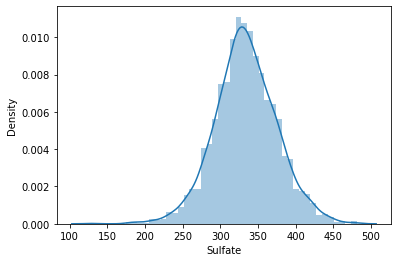

In [16]:
# check distribution of Sulfate
sns.distplot(df.Sulfate)

In [17]:
# as the Sulfate values exhibit a normal (gaussian) distribution,  we can safely replace the
# null-values with the mean of the Sulfate feature
df["Sulfate"] = df["Sulfate"].replace(np.nan,df.Sulfate.mean())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


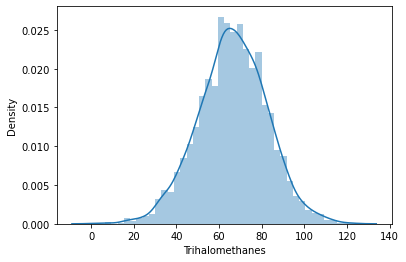

In [18]:
sns.distplot(df.Trihalomethanes)

In [19]:
# as the Trihalomethanes values exhibit a normal (gaussian) distribution,  we can safely replace the
# null-values with the mean of the Trihalomethanes feature
df["Trihalomethanes"] = df["Trihalomethanes"].replace(np.nan,df.Trihalomethanes.mean())

In [20]:
# check if the null-replacement is a success
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

Pair plots are used to determine which attributes are most effective at illuminating a relationship between two variables or in forming the most distinct clusters. By making linear separations or simple lines in our data set, it also helps to create some basic categorization models.

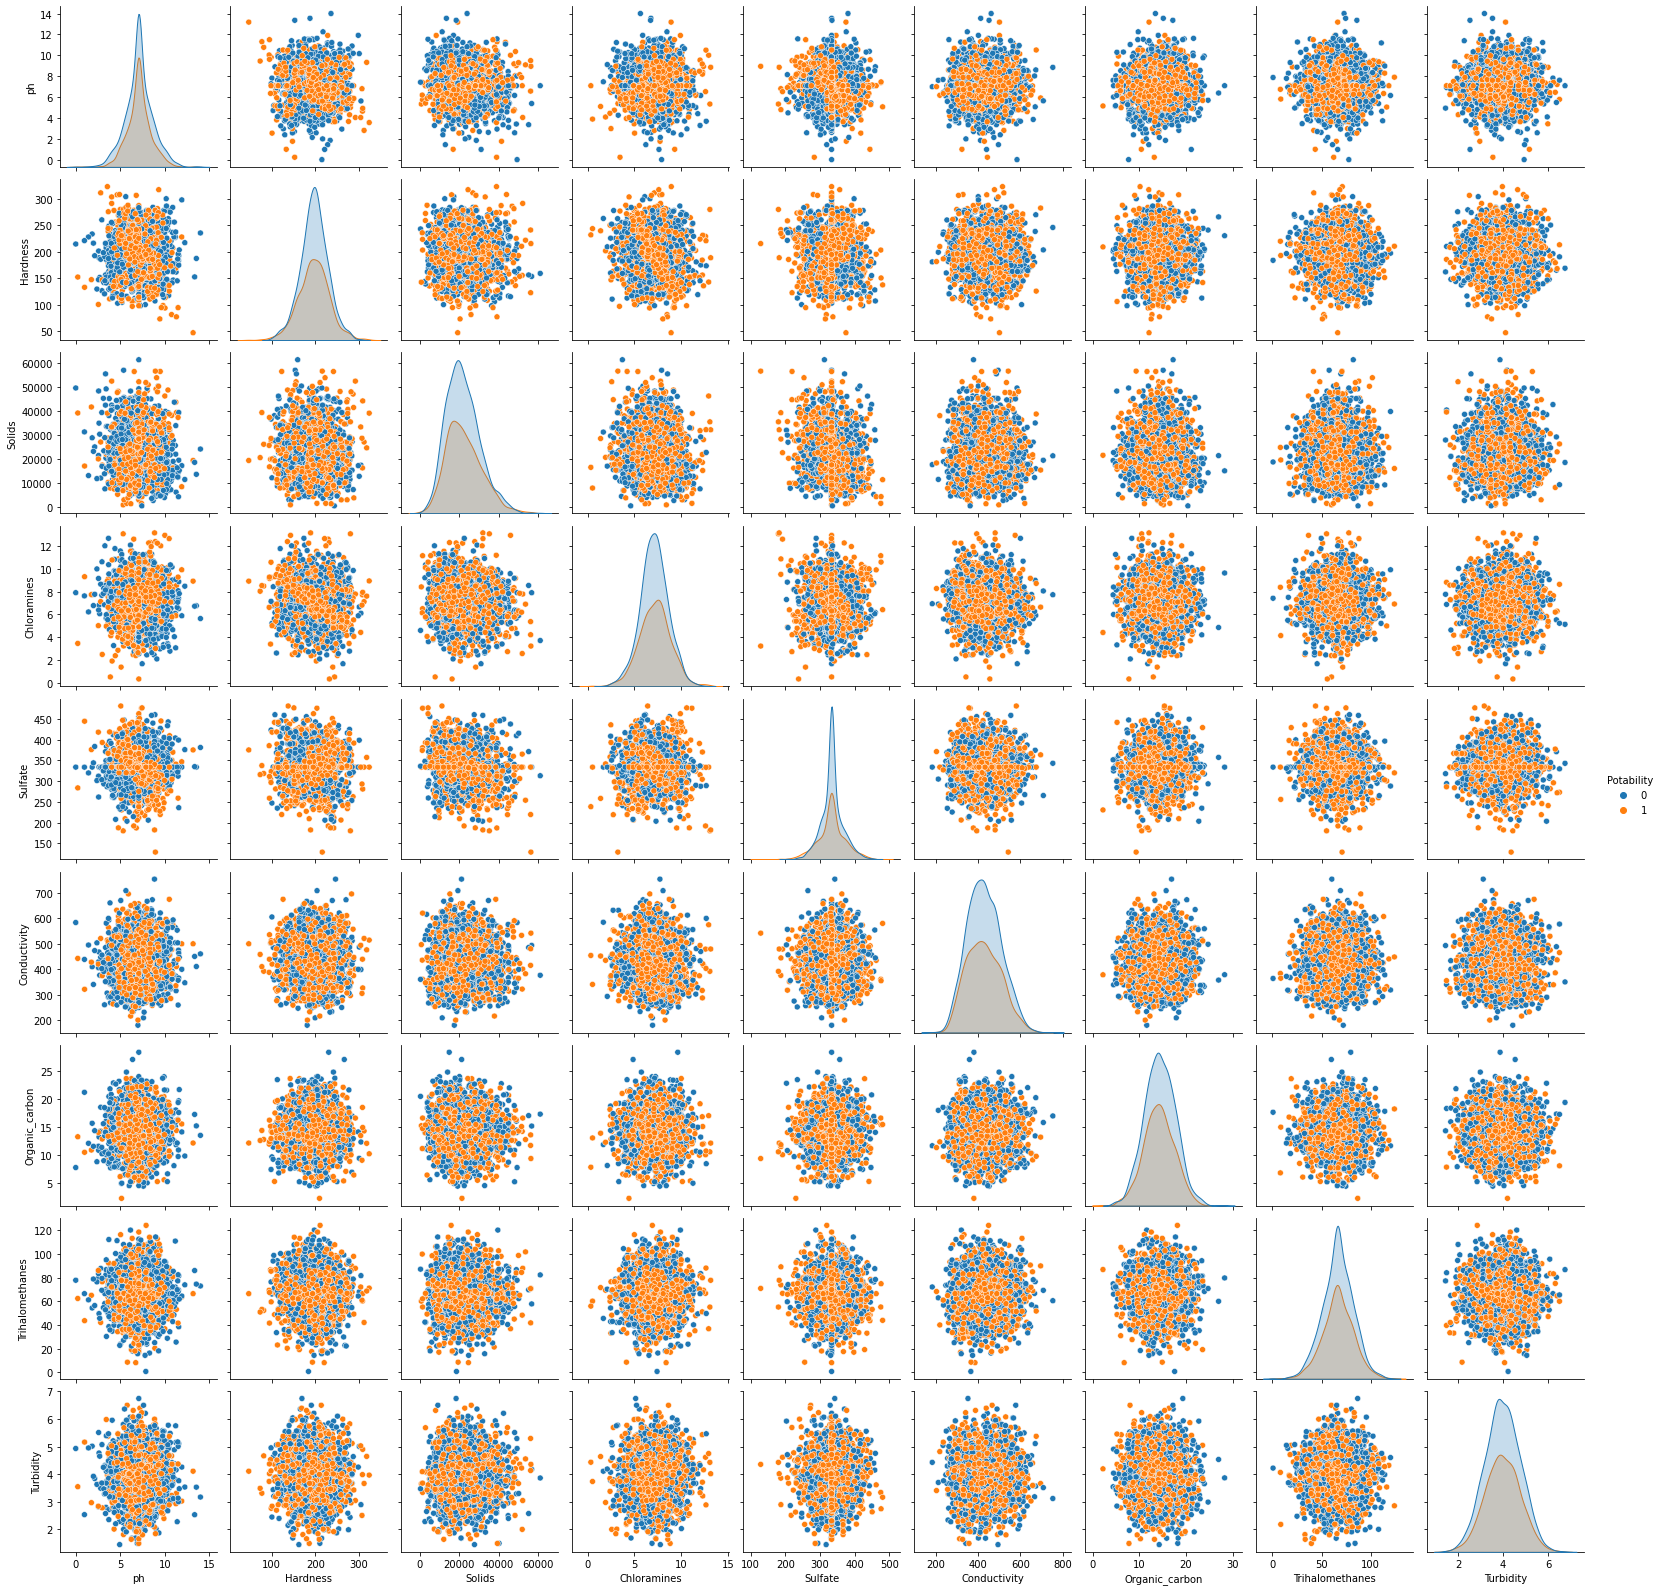

In [21]:
# lets check pairwise relationships in the dataset
sns.pairplot(data = df, hue="Potability")

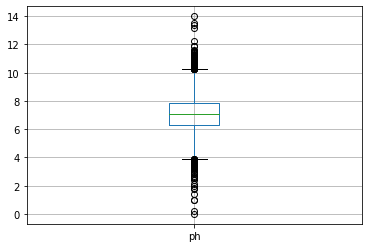

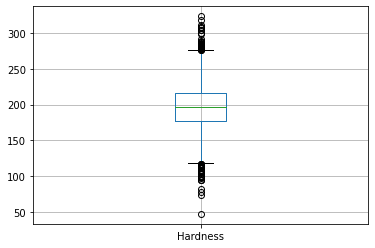

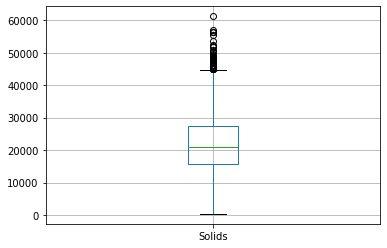

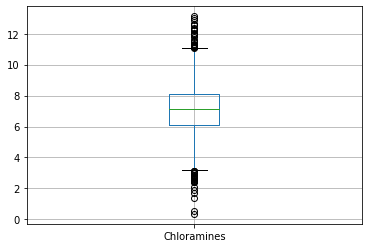

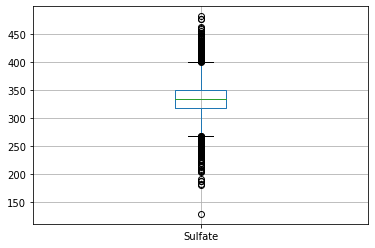

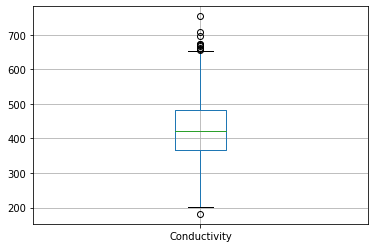

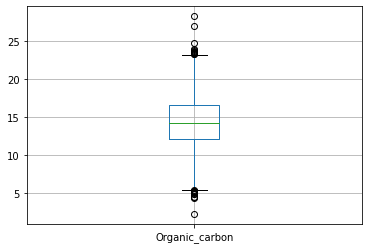

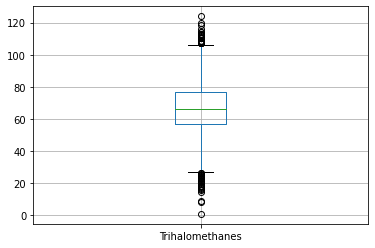

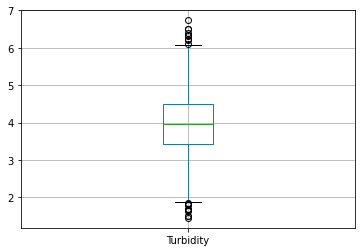

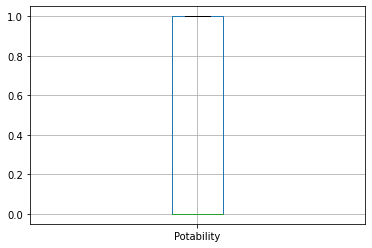

In [22]:
# create box charts to visualise any outliers etc.
# removing outliers can depend on domain knowledge
# ie. what does an outlier look like in your domain?  

for column in df.columns:
    plt.figure()
    df.boxplot([column])

In [23]:
# check feature correlation
df.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.075833,-0.081884,-0.031811,0.014403,0.017192,0.040061,0.002994,-0.036222,-0.003287
Hardness,0.075833,1.000000,-0.046899,-0.030054,-0.092766,-0.023915,0.003610,-0.012690,-0.014449,-0.013837
Solids,-0.081884,-0.046899,1.000000,-0.070148,-0.149840,0.013831,0.010242,-0.008875,0.019546,0.033743
Chloramines,-0.031811,-0.030054,-0.070148,1.000000,0.023791,-0.020486,-0.012653,0.016627,0.002363,0.023779
Sulfate,0.014403,-0.092766,-0.149840,0.023791,1.000000,-0.014059,0.026909,-0.025605,-0.009790,-0.020619
Conductivity,0.017192,-0.023915,0.013831,-0.020486,-0.014059,1.000000,0.020966,0.001255,0.005798,-0.008128
Organic_carbon,0.040061,0.003610,0.010242,-0.012653,0.026909,0.020966,1.000000,-0.012976,-0.027308,-0.030001
Trihalomethanes,0.002994,-0.012690,-0.008875,0.016627,-0.025605,0.001255,-0.012976,1.000000,-0.021502,0.006960
Turbidity,-0.036222,-0.014449,0.019546,0.002363,-0.009790,0.005798,-0.027308,-0.021502,1.000000,0.001581
Potability,-0.003287,-0.013837,0.033743,0.023779,-0.020619,-0.008128,-0.030001,0.006960,0.001581,1.000000


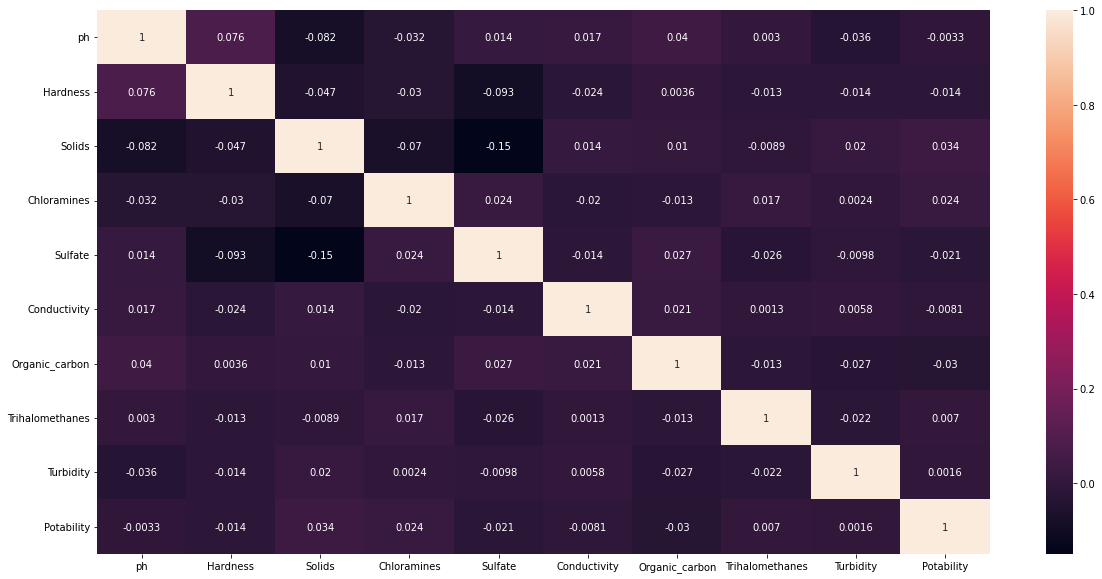

In [24]:
# visualise correlation
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

## Feature Engineering

In [25]:
# import Extra Trees Classifier and Random Forest Classifier
# splitting the data before feature engineering to avoid dataleaks. 
from sklearn.ensemble import ExtraTreesClassifier
X = df.drop(['Potability'],axis=1)
y = df.Potability

In [26]:
# invoke ExtraTreesClasifier 
ext = ExtraTreesClassifier()

# fit it to the X and y data. 
ext.fit(X, y)

ExtraTreesClassifier()

In [27]:
# check feature importance in numerical fashion
print(ext.feature_importances_)

[0.12484696 0.11734356 0.11252907 0.11466982 0.12920187 0.10165486
 0.10165502 0.09995265 0.09814621]


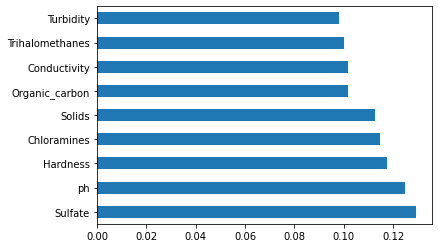

In [28]:
# plot feature importancee
feature = pd.Series(ext.feature_importances_,index=X.columns)
feature.sort_values(ascending=True).nlargest(10).plot(kind="barh")

In [29]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


## Standardising / Scaling Data

In [30]:
# import the standard scaler
from sklearn.preprocessing import StandardScaler

In [31]:
# invoke the StandardScaler
scale = StandardScaler()

In [32]:
# fit & transform the data contained in X
# you don't have to scale the target feature as it's a binary value
scaled = scale.fit_transform(X)

In [33]:
# create a datafram of the scaled data
scaled_df = pd.DataFrame(scaled, columns= X.columns)
scaled_df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,0.000000,0.259195,-0.139471,0.112415,0.961357,1.708954,-1.180651,1.306149,-1.286298
1,-2.289339,-2.036414,-0.385987,-0.307694,0.000000,2.062575,0.270597,-0.638480,0.684218
2,0.692868,0.847665,-0.240047,1.360594,0.000000,-0.094032,0.781117,0.001509,-1.167365
3,0.840950,0.547651,0.000493,0.592008,0.639519,-0.778830,1.255134,2.152874,0.848412
4,1.368569,-0.464429,-0.460249,-0.363698,-0.654177,-0.343939,-0.824357,-2.181599,0.138786


## Split the Data for Model Development

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify = y)

## Model Development

**We will use the following models:**

- **Logistic Regression** - *a statistical analysis method to predict a binary outcome, such as yes or no, based on prior observations of a data set.*
- **Support Vector Machine** - *finds decision boundaries / hyperplanes in high dimension spaces (more here: https://www.youtube.com/watch?v=6DibfCCI6t0)*
- **Random Forest** - *an ensemble learning algorithm which combines single decision trees and uses a "bagging method" to determine prediction / classification*

Other useful articles for accuracy metrics for classification problems: 

- [Understanding a Confusion Matrix](https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62)
- [F1, Precision & Recall](https://blog.exsilio.com/all/accuracy-precision-recall-f1-score-interpretation-of-performance-measures/)
- [Roc Auc Score](https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5)

In [35]:
# import the machine learning libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

### Logistic Regression

In [36]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_train_hat = lr.predict(X_train)
y_test_hat = lr.predict(X_test)


print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_hat))

print('Roc_auc score')
print('-------------------------------------------------------')
print(roc_auc_score(y_test, y_test_hat))
print('')

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_test_hat))
print('')

print('accuracy score')
print('-------------------------------------------------------')
print("test data accuracy score:",accuracy_score(y_test, y_test_hat)*100)
print("train data accuracy score:",accuracy_score(y_train, y_train_hat)*100)

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.61      1.00      0.76       600
           1       0.00      0.00      0.00       383

    accuracy                           0.61       983
   macro avg       0.31      0.50      0.38       983
weighted avg       0.37      0.61      0.46       983

Roc_auc score
-------------------------------------------------------
0.5

Confusion matrix
-------------------------------------------------------
[[600   0]
 [383   0]]

accuracy score
-------------------------------------------------------
test data accuracy score: 61.03763987792472
train data accuracy score: 60.968163977322284


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Support Vector Machines

In [37]:
svm = SVC()
svm.fit(X_train, y_train)
y_train_hat = svm.predict(X_train)
y_test_hat = svm.predict(X_test)

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_hat))

print('Roc_auc score')
print('-------------------------------------------------------')
print(roc_auc_score(y_test, y_test_hat))
print('')

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_test_hat))
print('')

print('accuracy score')
print('-------------------------------------------------------')
print(accuracy_score(y_test, y_test_hat)*100)
print("test data accuracy score:",accuracy_score(y_test, y_test_hat)*100)
print("train data accuracy score:",accuracy_score(y_train, y_train_hat)*100)

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.61      1.00      0.76       600
           1       0.00      0.00      0.00       383

    accuracy                           0.61       983
   macro avg       0.31      0.50      0.38       983
weighted avg       0.37      0.61      0.46       983

Roc_auc score
-------------------------------------------------------
0.5

Confusion matrix
-------------------------------------------------------
[[600   0]
 [383   0]]

accuracy score
-------------------------------------------------------
61.03763987792472
test data accuracy score: 61.03763987792472
train data accuracy score: 60.968163977322284


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Random Forest

In [38]:
rf = RandomForestClassifier(n_jobs=-1,random_state=123)
rf.fit(X_train, y_train)
y_train_hat = rf.predict(X_train)
y_test_hat = rf.predict(X_test)

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_hat))

print('Roc_auc score')
print('-------------------------------------------------------')
print(roc_auc_score(y_test, y_test_hat))
print('')

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_test_hat))
print('')

print('accuracy score')
print('-------------------------------------------------------')
print("test data accuracy score:",accuracy_score(y_test, y_test_hat)*100)
print("train data accuracy score:",accuracy_score(y_train, y_train_hat)*100)

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.68      0.88      0.76       600
           1       0.64      0.35      0.45       383

    accuracy                           0.67       983
   macro avg       0.66      0.61      0.61       983
weighted avg       0.66      0.67      0.64       983

Roc_auc score
-------------------------------------------------------
0.6119625761531767

Confusion matrix
-------------------------------------------------------
[[526  74]
 [250 133]]

accuracy score
-------------------------------------------------------
test data accuracy score: 67.03967446592065
train data accuracy score: 100.0


## Using Auto ML

###H2O Auto ML

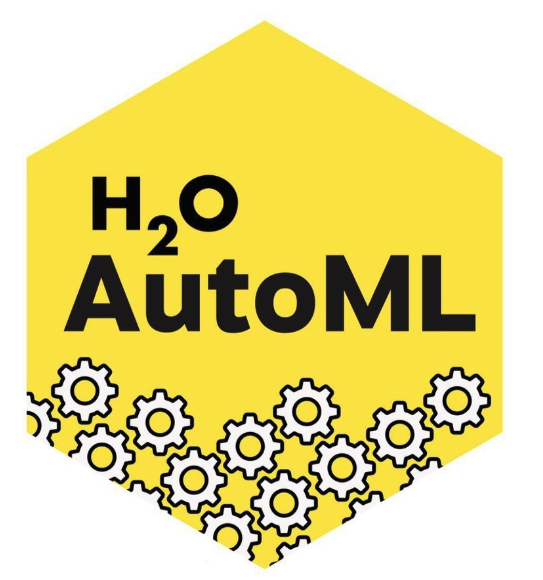

H2O is a distributed in-memory machine learning platform that is entirely open-source and has linear scalability. The most popular statistical & machine learning methods, such as deep learning, gradient boosted machines, and generalised linear models, are supported by H2O.

Useful articles:
- [H20 Documentation](https://docs.h2o.ai/h2o/latest-stable/h2o-docs/welcome.html)
- [Evaluation Metrics](https://docs.h2o.ai/h2o/latest-stable/h2o-docs/performance-and-prediction.html)
- [Parameter Appendix](https://docs.h2o.ai/h2o/latest-stable/h2o-docs/parameters.html)

### Installing H2O Auto ML

In [39]:
#!pip install requests
#!pip install tabulate
#!pip install "colorama>=0.3.8"
#!pip install future

In [40]:
#!pip install h2o

## Importing the h2o Python module and H2OAutoML class

In [41]:
import h2o
from h2o.automl import H2OAutoML
h2o.init(max_mem_size='16G')  ##  the h2o.init() makes sure that no prior instance of H2O is running.

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.15" 2022-04-19; OpenJDK Runtime Environment (build 11.0.15+10-Ubuntu-0ubuntu0.18.04.1); OpenJDK 64-Bit Server VM (build 11.0.15+10-Ubuntu-0ubuntu0.18.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpf48cfpx_
  JVM stdout: /tmp/tmpf48cfpx_/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpf48cfpx_/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.1.3
H2O_cluster_version_age:,23 days
H2O_cluster_name:,H2O_from_python_unknownUser_7kvyc2
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,16 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


### Loading data

In [42]:
df = h2o.import_file("drinking_water_potability.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [43]:
df.head()

ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
nan,204.89,20791.3,7.30021,368.516,564.309,10.3798,86.991,2.96314,0
3.71608,129.423,18630.1,6.63525,nan,592.885,15.18,56.3291,4.50066,0
8.09912,224.236,19909.5,9.27588,nan,418.606,16.8686,66.4201,3.05593,0
8.31677,214.373,22018.4,8.05933,356.886,363.267,18.4365,100.342,4.62877,0
9.09222,181.102,17979,6.5466,310.136,398.411,11.5583,31.998,4.07508,0
5.58409,188.313,28748.7,7.54487,326.678,280.468,8.39973,54.9179,2.55971,0
10.2239,248.072,28749.7,7.51341,393.663,283.652,13.7897,84.6036,2.67299,0
8.63585,203.362,13672.1,4.56301,303.31,474.608,12.3638,62.7983,4.40142,0
nan,118.989,14285.6,7.80417,268.647,389.376,12.706,53.9288,3.59502,0
11.1803,227.231,25484.5,9.0772,404.042,563.885,17.9278,71.9766,4.37056,0


## H2O AutoML Clean & Preprocess

In [44]:
# AutoML can do all the data processing and cleaning 
df_train, df_test = df.split_frame(ratios=[.8])

### Splitting the data

In [45]:
y = "Potability"  # dependent variable
X = df.columns  # independent variable
                   
X.remove(y)

### Defining the model

In [46]:
aml = H2OAutoML(max_runtime_secs=300, max_models = 10, seed = 10, verbosity="info", nfolds=5)

# changing the target variable to a categorical variable
df_train[y] = df_train[y].asfactor()
df_test[y] = df_test[y].asfactor()

### Fitting the model

In [47]:
aml.train(x = X, y = y, training_frame = df_train)

AutoML progress: |
13:57:08.90: Project: AutoML_1_20220801_135708
13:57:08.99: Setting stopping tolerance adaptively based on the training frame: 0.019600308903302492
13:57:08.99: Build control seed: 10
13:57:08.100: training frame: Frame key: AutoML_1_20220801_135708_training_py_5_sid_ae6a    cols: 10    rows: 2603  chunks: 8    size: 192969  checksum: -3541947158166013333
13:57:08.101: validation frame: NULL
13:57:08.101: leaderboard frame: NULL
13:57:08.101: blending frame: NULL
13:57:08.101: response column: Potability
13:57:08.102: fold column: null
13:57:08.102: weights column: null
13:57:08.163: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w), lr_annealing (7g, 10w)]}, {DeepLearning : [def_1 (3g, 10w), grid_1 (4g, 30w), gr

,,0,1,Error,Rate
0,0,1566.0,9.0,0.0057,(9.0/1575.0)
1,1,2.0,1026.0,0.0019,(2.0/1028.0)
2,Total,1568.0,1035.0,0.0042,(11.0/2603.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.412802,0.994668,208.0
1,max f2,0.402613,0.996894,210.0
2,max f0point5,0.433249,0.993964,204.0
3,max accuracy,0.412802,0.995774,208.0
4,max precision,0.999381,1.000000,0.0
5,max recall,0.360381,1.000000,218.0
6,max specificity,0.999381,1.000000,0.0
7,max absolute_mcc,0.412802,0.991184,208.0
8,max min_per_class_accuracy,0.423402,0.994921,206.0
9,max mean_per_class_accuracy,0.412802,0.996170,208.0



Gains/Lift Table: Avg response rate: 39.49 %, avg score: 39.31 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010373,0.929434,2.532101,2.532101,1.000000,0.958806,1.000000,0.958806,0.026265,0.026265,153.210117,153.210117,0.026265
1,2,0.020361,0.898502,2.532101,2.532101,1.000000,0.914174,1.000000,0.936911,0.025292,0.051556,153.210117,153.210117,0.051556
2,3,0.030350,0.881713,2.532101,2.532101,1.000000,0.889548,1.000000,0.921323,0.025292,0.076848,153.210117,153.210117,0.076848
3,4,0.040338,0.865029,2.532101,2.532101,1.000000,0.873719,1.000000,0.909536,0.025292,0.102140,153.210117,153.210117,0.102140
4,5,0.050327,0.843160,2.532101,2.532101,1.000000,0.854015,1.000000,0.898516,0.025292,0.127432,153.210117,153.210117,0.127432
5,6,0.100269,0.778018,2.532101,2.532101,1.000000,0.808421,1.000000,0.853641,0.126459,0.253891,153.210117,153.210117,0.253891
6,7,0.150211,0.728667,2.532101,2.532101,1.000000,0.750659,1.000000,0.819402,0.126459,0.380350,153.210117,153.210117,0.380350
7,8,0.200154,0.688303,2.532101,2.532101,1.000000,0.708884,1.000000,0.791825,0.126459,0.506809,153.210117,153.210117,0.506809
8,9,0.300038,0.607035,2.532101,2.532101,1.000000,0.646268,1.000000,0.743368,0.252918,0.759728,153.210117,153.210117,0.759728
9,10,0.399923,0.395928,2.395757,2.498048,0.946154,0.534655,0.986551,0.691240,0.239300,0.999027,139.575726,149.804793,0.990138




ModelMetricsBinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.21539898198944774
RMSE: 0.46411095870432506
LogLoss: 0.6195213710849431
Null degrees of freedom: 2602
Residual degrees of freedom: 2598
Null deviance: 3497.431223470212
Residual deviance: 3225.228257868214
AIC: 3235.228257868214
AUC: 0.6726205916867395
AUCPR: 0.5895764056695667
Gini: 0.345241183373479

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2924646991337192: 


,,0,1,Error,Rate
0,0,529.0,1046.0,0.6641,(1046.0/1575.0)
1,1,147.0,881.0,0.143,(147.0/1028.0)
2,Total,676.0,1927.0,0.4583,(1193.0/2603.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.292465,0.596277,292.0
1,max f2,0.180220,0.769056,360.0
2,max f0point5,0.473448,0.540789,151.0
3,max accuracy,0.541970,0.662313,111.0
4,max precision,0.948369,1.000000,0.0
5,max recall,0.117216,1.000000,385.0
6,max specificity,0.948369,1.000000,0.0
7,max absolute_mcc,0.541970,0.253972,111.0
8,max min_per_class_accuracy,0.386671,0.615759,217.0
9,max mean_per_class_accuracy,0.368387,0.621277,231.0



Gains/Lift Table: Avg response rate: 39.49 %, avg score: 39.49 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010373,0.849366,2.250757,2.250757,0.888889,0.884774,0.888889,0.884774,0.023346,0.023346,125.075659,125.075659,0.021442
1,2,0.020361,0.780764,2.045159,2.149897,0.807692,0.811208,0.849057,0.848685,0.020428,0.043774,104.515864,114.989722,0.038695
2,3,0.030350,0.741333,2.142547,2.147478,0.846154,0.757528,0.848101,0.818684,0.021401,0.065175,114.254714,114.747821,0.057556
3,4,0.040338,0.709063,1.947770,2.098027,0.769231,0.726793,0.828571,0.795930,0.019455,0.084630,94.777013,109.802668,0.073202
4,5,0.050327,0.686908,2.337324,2.145521,0.923077,0.697179,0.847328,0.776331,0.023346,0.107977,133.732415,114.552084,0.095278
5,6,0.100269,0.599879,1.577694,1.862695,0.623077,0.635896,0.735632,0.706383,0.078794,0.186770,57.769380,86.269511,0.142961
6,7,0.150211,0.543536,1.480305,1.735558,0.584615,0.567291,0.685422,0.660137,0.073930,0.260700,48.030530,73.555783,0.182605
7,8,0.200154,0.507868,1.207617,1.603826,0.476923,0.525129,0.633397,0.626450,0.060311,0.321012,20.761748,60.382608,0.199742
8,9,0.300038,0.454352,1.081012,1.429778,0.426923,0.481666,0.564661,0.578250,0.107977,0.428988,8.101242,42.977800,0.213115
9,10,0.399923,0.413333,1.110229,1.349967,0.438462,0.433007,0.533141,0.541974,0.110895,0.539883,11.022897,34.996748,0.231312




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.520455,0.061672,0.486692,0.567619,0.447217,0.501923,0.598826
1,auc,0.675938,0.033582,0.644734,0.703992,0.634648,0.692771,0.703545
2,err,0.479545,0.061672,0.513308,0.432381,0.552783,0.498077,0.401174
3,err_count,249.800000,33.461918,270.000000,227.000000,288.000000,259.000000,205.000000
4,f0point5,0.501563,0.047322,0.450161,0.524846,0.476519,0.484941,0.571346
5,f1,0.604038,0.038786,0.554455,0.623549,0.589744,0.594679,0.657763
6,f2,0.761351,0.022401,0.721649,0.767974,0.773543,0.768608,0.774980
7,lift_top_group,2.113465,0.281562,2.356631,2.113527,1.638365,2.177554,2.281250
8,logloss,0.618674,0.014653,0.616175,0.605880,0.642565,0.608005,0.620744
9,max_per_class_error,0.742030,0.116344,0.741177,0.654088,0.915858,0.778816,0.620209



See the whole table with table.as_data_frame()


### Check the Leaderboard

In [48]:
lb = aml.leaderboard

In [49]:
lb

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_BestOfFamily_1_AutoML_1_20220801_135708,0.672621,0.619521,0.589576,0.403562,0.464111,0.215399
StackedEnsemble_AllModels_1_AutoML_1_20220801_135708,0.670682,0.61999,0.590731,0.411012,0.464321,0.215594
DRF_1_AutoML_1_20220801_135708,0.66275,0.628991,0.574262,0.435541,0.468148,0.219162
GBM_2_AutoML_1_20220801_135708,0.661388,0.626099,0.575292,0.413598,0.4673,0.218369
XRT_1_AutoML_1_20220801_135708,0.657372,0.626149,0.58367,0.449696,0.467328,0.218396
GBM_4_AutoML_1_20220801_135708,0.652397,0.629705,0.575789,0.431085,0.468762,0.219738
GBM_3_AutoML_1_20220801_135708,0.652254,0.630131,0.565905,0.452276,0.469125,0.220078
XGBoost_3_AutoML_1_20220801_135708,0.648902,0.644569,0.554818,0.429288,0.474872,0.225504
XGBoost_1_AutoML_1_20220801_135708,0.635282,0.664419,0.540259,0.43206,0.482273,0.232587
GBM_1_AutoML_1_20220801_135708,0.631977,0.64136,0.546303,0.441133,0.474451,0.225104


## Getting all the model ids

In [50]:
model_ids = list(aml.leaderboard["model_id"].as_data_frame().iloc[:,0])

In [51]:
model_ids

['StackedEnsemble_BestOfFamily_1_AutoML_1_20220801_135708',
 'StackedEnsemble_AllModels_1_AutoML_1_20220801_135708',
 'DRF_1_AutoML_1_20220801_135708',
 'GBM_2_AutoML_1_20220801_135708',
 'XRT_1_AutoML_1_20220801_135708',
 'GBM_4_AutoML_1_20220801_135708',
 'GBM_3_AutoML_1_20220801_135708',
 'XGBoost_3_AutoML_1_20220801_135708',
 'XGBoost_1_AutoML_1_20220801_135708',
 'GBM_1_AutoML_1_20220801_135708',
 'XGBoost_2_AutoML_1_20220801_135708',
 'GLM_1_AutoML_1_20220801_135708']

In [52]:
aml.leader.model_performance(df_test)


ModelMetricsBinomialGLM: stackedensemble
** Reported on test data. **

MSE: 0.205481228318841
RMSE: 0.4533003731730661
LogLoss: 0.6049940296321974
Null degrees of freedom: 672
Residual degrees of freedom: 668
Null deviance: 889.5630427493963
Residual deviance: 814.3219638849376
AIC: 824.3219638849376
AUC: 0.6926524822695036
AUCPR: 0.5986234219642436
Gini: 0.3853049645390072

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3232819304204205: 


,,0,1,Error,Rate
0,0,198.0,225.0,0.5319,(225.0/423.0)
1,1,56.0,194.0,0.224,(56.0/250.0)
2,Total,254.0,419.0,0.4175,(281.0/673.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.323282,0.579970,252.0
1,max f2,0.163822,0.755177,374.0
2,max f0point5,0.456281,0.584211,132.0
3,max accuracy,0.456281,0.698366,132.0
4,max precision,0.759907,0.923077,12.0
5,max recall,0.120755,1.000000,389.0
6,max specificity,0.999221,0.997636,0.0
7,max absolute_mcc,0.456281,0.322425,132.0
8,max min_per_class_accuracy,0.371567,0.632000,206.0
9,max mean_per_class_accuracy,0.411759,0.655069,170.0



Gains/Lift Table: Avg response rate: 37.15 %, avg score: 37.89 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010401,0.836631,2.307429,2.307429,0.857143,0.884995,0.857143,0.884995,0.024,0.024,130.742857,130.742857,0.021636
1,2,0.020802,0.746224,2.307429,2.307429,0.857143,0.793543,0.857143,0.839269,0.024,0.048,130.742857,130.742857,0.043272
2,3,0.031204,0.717944,2.307429,2.307429,0.857143,0.725836,0.857143,0.801458,0.024,0.072,130.742857,130.742857,0.064908
3,4,0.040119,0.690475,2.243333,2.293185,0.833333,0.705400,0.851852,0.780112,0.020,0.092,124.333333,129.318519,0.082544
4,5,0.050520,0.668974,2.692000,2.375294,1.000000,0.682270,0.882353,0.759968,0.028,0.120,169.200000,137.529412,0.110544
5,6,0.101040,0.579081,1.979412,2.177353,0.735294,0.617694,0.808824,0.688831,0.100,0.220,97.941176,117.735294,0.189267
6,7,0.150074,0.530187,1.386788,1.919050,0.515152,0.555454,0.712871,0.645252,0.068,0.288,38.678788,91.904950,0.219442
7,8,0.200594,0.483724,1.187647,1.734844,0.441176,0.504850,0.644444,0.609892,0.060,0.348,18.764706,73.484444,0.234525
8,9,0.300149,0.439403,1.245552,1.572554,0.462687,0.459862,0.584158,0.560129,0.124,0.472,24.555224,57.255446,0.273418
9,10,0.399703,0.398538,1.125015,1.461086,0.417910,0.416290,0.542751,0.524303,0.112,0.584,12.501493,46.108550,0.293220


### Getting the model details for best performing model

In [53]:
h2o.get_model([mid for mid in model_ids if "StackedEnsemble" in mid][0])

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_BestOfFamily_1_AutoML_1_20220801_135708

No model summary for this model

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.06951499593891129
RMSE: 0.2636569664145275
LogLoss: 0.2854517339547821
Null degrees of freedom: 2602
Residual degrees of freedom: 2598
Null deviance: 3492.7151519264726
Residual deviance: 1486.0617269685958
AIC: 1496.0617269685958
AUC: 0.999806991538509
AUCPR: 0.9996965302947466
Gini: 0.9996139830770181

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4128023381210243: 


,,0,1,Error,Rate
0,0,1566.0,9.0,0.0057,(9.0/1575.0)
1,1,2.0,1026.0,0.0019,(2.0/1028.0)
2,Total,1568.0,1035.0,0.0042,(11.0/2603.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.412802,0.994668,208.0
1,max f2,0.402613,0.996894,210.0
2,max f0point5,0.433249,0.993964,204.0
3,max accuracy,0.412802,0.995774,208.0
4,max precision,0.999381,1.000000,0.0
5,max recall,0.360381,1.000000,218.0
6,max specificity,0.999381,1.000000,0.0
7,max absolute_mcc,0.412802,0.991184,208.0
8,max min_per_class_accuracy,0.423402,0.994921,206.0
9,max mean_per_class_accuracy,0.412802,0.996170,208.0



Gains/Lift Table: Avg response rate: 39.49 %, avg score: 39.31 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010373,0.929434,2.532101,2.532101,1.000000,0.958806,1.000000,0.958806,0.026265,0.026265,153.210117,153.210117,0.026265
1,2,0.020361,0.898502,2.532101,2.532101,1.000000,0.914174,1.000000,0.936911,0.025292,0.051556,153.210117,153.210117,0.051556
2,3,0.030350,0.881713,2.532101,2.532101,1.000000,0.889548,1.000000,0.921323,0.025292,0.076848,153.210117,153.210117,0.076848
3,4,0.040338,0.865029,2.532101,2.532101,1.000000,0.873719,1.000000,0.909536,0.025292,0.102140,153.210117,153.210117,0.102140
4,5,0.050327,0.843160,2.532101,2.532101,1.000000,0.854015,1.000000,0.898516,0.025292,0.127432,153.210117,153.210117,0.127432
5,6,0.100269,0.778018,2.532101,2.532101,1.000000,0.808421,1.000000,0.853641,0.126459,0.253891,153.210117,153.210117,0.253891
6,7,0.150211,0.728667,2.532101,2.532101,1.000000,0.750659,1.000000,0.819402,0.126459,0.380350,153.210117,153.210117,0.380350
7,8,0.200154,0.688303,2.532101,2.532101,1.000000,0.708884,1.000000,0.791825,0.126459,0.506809,153.210117,153.210117,0.506809
8,9,0.300038,0.607035,2.532101,2.532101,1.000000,0.646268,1.000000,0.743368,0.252918,0.759728,153.210117,153.210117,0.759728
9,10,0.399923,0.395928,2.395757,2.498048,0.946154,0.534655,0.986551,0.691240,0.239300,0.999027,139.575726,149.804793,0.990138




ModelMetricsBinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.21539898198944774
RMSE: 0.46411095870432506
LogLoss: 0.6195213710849431
Null degrees of freedom: 2602
Residual degrees of freedom: 2598
Null deviance: 3497.431223470212
Residual deviance: 3225.228257868214
AIC: 3235.228257868214
AUC: 0.6726205916867395
AUCPR: 0.5895764056695667
Gini: 0.345241183373479

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2924646991337192: 


,,0,1,Error,Rate
0,0,529.0,1046.0,0.6641,(1046.0/1575.0)
1,1,147.0,881.0,0.143,(147.0/1028.0)
2,Total,676.0,1927.0,0.4583,(1193.0/2603.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.292465,0.596277,292.0
1,max f2,0.180220,0.769056,360.0
2,max f0point5,0.473448,0.540789,151.0
3,max accuracy,0.541970,0.662313,111.0
4,max precision,0.948369,1.000000,0.0
5,max recall,0.117216,1.000000,385.0
6,max specificity,0.948369,1.000000,0.0
7,max absolute_mcc,0.541970,0.253972,111.0
8,max min_per_class_accuracy,0.386671,0.615759,217.0
9,max mean_per_class_accuracy,0.368387,0.621277,231.0



Gains/Lift Table: Avg response rate: 39.49 %, avg score: 39.49 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010373,0.849366,2.250757,2.250757,0.888889,0.884774,0.888889,0.884774,0.023346,0.023346,125.075659,125.075659,0.021442
1,2,0.020361,0.780764,2.045159,2.149897,0.807692,0.811208,0.849057,0.848685,0.020428,0.043774,104.515864,114.989722,0.038695
2,3,0.030350,0.741333,2.142547,2.147478,0.846154,0.757528,0.848101,0.818684,0.021401,0.065175,114.254714,114.747821,0.057556
3,4,0.040338,0.709063,1.947770,2.098027,0.769231,0.726793,0.828571,0.795930,0.019455,0.084630,94.777013,109.802668,0.073202
4,5,0.050327,0.686908,2.337324,2.145521,0.923077,0.697179,0.847328,0.776331,0.023346,0.107977,133.732415,114.552084,0.095278
5,6,0.100269,0.599879,1.577694,1.862695,0.623077,0.635896,0.735632,0.706383,0.078794,0.186770,57.769380,86.269511,0.142961
6,7,0.150211,0.543536,1.480305,1.735558,0.584615,0.567291,0.685422,0.660137,0.073930,0.260700,48.030530,73.555783,0.182605
7,8,0.200154,0.507868,1.207617,1.603826,0.476923,0.525129,0.633397,0.626450,0.060311,0.321012,20.761748,60.382608,0.199742
8,9,0.300038,0.454352,1.081012,1.429778,0.426923,0.481666,0.564661,0.578250,0.107977,0.428988,8.101242,42.977800,0.213115
9,10,0.399923,0.413333,1.110229,1.349967,0.438462,0.433007,0.533141,0.541974,0.110895,0.539883,11.022897,34.996748,0.231312




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.520455,0.061672,0.486692,0.567619,0.447217,0.501923,0.598826
1,auc,0.675938,0.033582,0.644734,0.703992,0.634648,0.692771,0.703545
2,err,0.479545,0.061672,0.513308,0.432381,0.552783,0.498077,0.401174
3,err_count,249.800000,33.461918,270.000000,227.000000,288.000000,259.000000,205.000000
4,f0point5,0.501563,0.047322,0.450161,0.524846,0.476519,0.484941,0.571346
5,f1,0.604038,0.038786,0.554455,0.623549,0.589744,0.594679,0.657763
6,f2,0.761351,0.022401,0.721649,0.767974,0.773543,0.768608,0.774980
7,lift_top_group,2.113465,0.281562,2.356631,2.113527,1.638365,2.177554,2.281250
8,logloss,0.618674,0.014653,0.616175,0.605880,0.642565,0.608005,0.620744
9,max_per_class_error,0.742030,0.116344,0.741177,0.654088,0.915858,0.778816,0.620209



See the whole table with table.as_data_frame()


In [54]:
output= h2o.get_model([mid for mid in model_ids if "StackedEnsemble" in mid][0])
output.params

{'auc_type': {'actual': 'AUTO', 'default': 'AUTO', 'input': 'AUTO'},
 'base_models': {'actual': [{'URL': None,
    '__meta': {'schema_name': 'KeyV3',
     'schema_type': 'Key<Keyed>',
     'schema_version': 3},
    'name': 'DRF_1_AutoML_1_20220801_135708',
    'type': 'Key<Keyed>'},
   {'URL': None,
    '__meta': {'schema_name': 'KeyV3',
     'schema_type': 'Key<Keyed>',
     'schema_version': 3},
    'name': 'GBM_2_AutoML_1_20220801_135708',
    'type': 'Key<Keyed>'},
   {'URL': None,
    '__meta': {'schema_name': 'KeyV3',
     'schema_type': 'Key<Keyed>',
     'schema_version': 3},
    'name': 'XRT_1_AutoML_1_20220801_135708',
    'type': 'Key<Keyed>'},
   {'URL': None,
    '__meta': {'schema_name': 'KeyV3',
     'schema_type': 'Key<Keyed>',
     'schema_version': 3},
    'name': 'XGBoost_3_AutoML_1_20220801_135708',
    'type': 'Key<Keyed>'},
   {'URL': None,
    '__meta': {'schema_name': 'KeyV3',
     'schema_type': 'Key<Keyed>',
     'schema_version': 3},
    'name': 'GLM_1_AutoML

In [55]:
aml.leader

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_BestOfFamily_1_AutoML_1_20220801_135708

No model summary for this model

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.06951499593891129
RMSE: 0.2636569664145275
LogLoss: 0.2854517339547821
Null degrees of freedom: 2602
Residual degrees of freedom: 2598
Null deviance: 3492.7151519264726
Residual deviance: 1486.0617269685958
AIC: 1496.0617269685958
AUC: 0.999806991538509
AUCPR: 0.9996965302947466
Gini: 0.9996139830770181

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4128023381210243: 


,,0,1,Error,Rate
0,0,1566.0,9.0,0.0057,(9.0/1575.0)
1,1,2.0,1026.0,0.0019,(2.0/1028.0)
2,Total,1568.0,1035.0,0.0042,(11.0/2603.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.412802,0.994668,208.0
1,max f2,0.402613,0.996894,210.0
2,max f0point5,0.433249,0.993964,204.0
3,max accuracy,0.412802,0.995774,208.0
4,max precision,0.999381,1.000000,0.0
5,max recall,0.360381,1.000000,218.0
6,max specificity,0.999381,1.000000,0.0
7,max absolute_mcc,0.412802,0.991184,208.0
8,max min_per_class_accuracy,0.423402,0.994921,206.0
9,max mean_per_class_accuracy,0.412802,0.996170,208.0



Gains/Lift Table: Avg response rate: 39.49 %, avg score: 39.31 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010373,0.929434,2.532101,2.532101,1.000000,0.958806,1.000000,0.958806,0.026265,0.026265,153.210117,153.210117,0.026265
1,2,0.020361,0.898502,2.532101,2.532101,1.000000,0.914174,1.000000,0.936911,0.025292,0.051556,153.210117,153.210117,0.051556
2,3,0.030350,0.881713,2.532101,2.532101,1.000000,0.889548,1.000000,0.921323,0.025292,0.076848,153.210117,153.210117,0.076848
3,4,0.040338,0.865029,2.532101,2.532101,1.000000,0.873719,1.000000,0.909536,0.025292,0.102140,153.210117,153.210117,0.102140
4,5,0.050327,0.843160,2.532101,2.532101,1.000000,0.854015,1.000000,0.898516,0.025292,0.127432,153.210117,153.210117,0.127432
5,6,0.100269,0.778018,2.532101,2.532101,1.000000,0.808421,1.000000,0.853641,0.126459,0.253891,153.210117,153.210117,0.253891
6,7,0.150211,0.728667,2.532101,2.532101,1.000000,0.750659,1.000000,0.819402,0.126459,0.380350,153.210117,153.210117,0.380350
7,8,0.200154,0.688303,2.532101,2.532101,1.000000,0.708884,1.000000,0.791825,0.126459,0.506809,153.210117,153.210117,0.506809
8,9,0.300038,0.607035,2.532101,2.532101,1.000000,0.646268,1.000000,0.743368,0.252918,0.759728,153.210117,153.210117,0.759728
9,10,0.399923,0.395928,2.395757,2.498048,0.946154,0.534655,0.986551,0.691240,0.239300,0.999027,139.575726,149.804793,0.990138




ModelMetricsBinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.21539898198944774
RMSE: 0.46411095870432506
LogLoss: 0.6195213710849431
Null degrees of freedom: 2602
Residual degrees of freedom: 2598
Null deviance: 3497.431223470212
Residual deviance: 3225.228257868214
AIC: 3235.228257868214
AUC: 0.6726205916867395
AUCPR: 0.5895764056695667
Gini: 0.345241183373479

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2924646991337192: 


,,0,1,Error,Rate
0,0,529.0,1046.0,0.6641,(1046.0/1575.0)
1,1,147.0,881.0,0.143,(147.0/1028.0)
2,Total,676.0,1927.0,0.4583,(1193.0/2603.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.292465,0.596277,292.0
1,max f2,0.180220,0.769056,360.0
2,max f0point5,0.473448,0.540789,151.0
3,max accuracy,0.541970,0.662313,111.0
4,max precision,0.948369,1.000000,0.0
5,max recall,0.117216,1.000000,385.0
6,max specificity,0.948369,1.000000,0.0
7,max absolute_mcc,0.541970,0.253972,111.0
8,max min_per_class_accuracy,0.386671,0.615759,217.0
9,max mean_per_class_accuracy,0.368387,0.621277,231.0



Gains/Lift Table: Avg response rate: 39.49 %, avg score: 39.49 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010373,0.849366,2.250757,2.250757,0.888889,0.884774,0.888889,0.884774,0.023346,0.023346,125.075659,125.075659,0.021442
1,2,0.020361,0.780764,2.045159,2.149897,0.807692,0.811208,0.849057,0.848685,0.020428,0.043774,104.515864,114.989722,0.038695
2,3,0.030350,0.741333,2.142547,2.147478,0.846154,0.757528,0.848101,0.818684,0.021401,0.065175,114.254714,114.747821,0.057556
3,4,0.040338,0.709063,1.947770,2.098027,0.769231,0.726793,0.828571,0.795930,0.019455,0.084630,94.777013,109.802668,0.073202
4,5,0.050327,0.686908,2.337324,2.145521,0.923077,0.697179,0.847328,0.776331,0.023346,0.107977,133.732415,114.552084,0.095278
5,6,0.100269,0.599879,1.577694,1.862695,0.623077,0.635896,0.735632,0.706383,0.078794,0.186770,57.769380,86.269511,0.142961
6,7,0.150211,0.543536,1.480305,1.735558,0.584615,0.567291,0.685422,0.660137,0.073930,0.260700,48.030530,73.555783,0.182605
7,8,0.200154,0.507868,1.207617,1.603826,0.476923,0.525129,0.633397,0.626450,0.060311,0.321012,20.761748,60.382608,0.199742
8,9,0.300038,0.454352,1.081012,1.429778,0.426923,0.481666,0.564661,0.578250,0.107977,0.428988,8.101242,42.977800,0.213115
9,10,0.399923,0.413333,1.110229,1.349967,0.438462,0.433007,0.533141,0.541974,0.110895,0.539883,11.022897,34.996748,0.231312




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.520455,0.061672,0.486692,0.567619,0.447217,0.501923,0.598826
1,auc,0.675938,0.033582,0.644734,0.703992,0.634648,0.692771,0.703545
2,err,0.479545,0.061672,0.513308,0.432381,0.552783,0.498077,0.401174
3,err_count,249.800000,33.461918,270.000000,227.000000,288.000000,259.000000,205.000000
4,f0point5,0.501563,0.047322,0.450161,0.524846,0.476519,0.484941,0.571346
5,f1,0.604038,0.038786,0.554455,0.623549,0.589744,0.594679,0.657763
6,f2,0.761351,0.022401,0.721649,0.767974,0.773543,0.768608,0.774980
7,lift_top_group,2.113465,0.281562,2.356631,2.113527,1.638365,2.177554,2.281250
8,logloss,0.618674,0.014653,0.616175,0.605880,0.642565,0.608005,0.620744
9,max_per_class_error,0.742030,0.116344,0.741177,0.654088,0.915858,0.778816,0.620209



See the whole table with table.as_data_frame()


In [56]:
# apply best model to new, unseen data. 
y_pred = aml.leader.predict(df_test)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [60]:
# prediction with their weighting
y_pred

predict,p0,p1
0,0.712029,0.287971
1,0.616493,0.383507
1,0.530226,0.469774
1,0.701519,0.298481
0,0.754582,0.245418
1,0.606758,0.393242
1,0.68661,0.31339
1,0.558442,0.441558
1,0.398751,0.601249
0,0.829238,0.170762
